In [2]:
import numpy as np
import pandas as pd
from dstk.utils.data_cleaning import clean_columns

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set_style('dark')
plt.rcParams['figure.figsize'] = (9,6)
np.set_printoptions(suppress=True)
pd.options.display.max_columns = 150

In [3]:
def col_descrip(table, col):
    "Looks up column description for given table"
    print(table)
    print(col)
    return col_des.loc[(col_des.Table==table) & (col_des.Row==col.upper()),
            'Description'].values[0]

def anom_eval(df, col, filename):
    print(col_descrip(filename, col))
    print()

    max_diff_idx = df[col].sort_values().diff().nlargest(3).index
    max_diffs = df.loc[max_diff_idx, col]
    nlargest = df[col].nlargest()
    nsmallest = df[col].nsmallest()

    print('Max Diffs')
    print(max_diffs)
    print()
    print("Largest Vals")
    print(nlargest)
    print()
    print("Smallest Vals")
    print(nsmallest)
    df[col].hist()
    df[col].value_counts().sort_index()

    return max_diffs, nlargest

def pct_null(df):
    null_counts = df.isnull().sum()[df.isnull().sum()>0].sort_values(ascending=False).to_frame()
    if null_counts.empty:
        return None
    null_counts['pct_null'] = null_counts/df.shape[0]
    null_counts.columns = ['n_null', 'pct_null']
    return null_counts

In [4]:
col_des = pd.read_csv('HomeCredit_columns_description.csv', encoding='latin-1')
col_des.shape

(219, 5)

In [5]:
prev_apps = pd.read_csv("previous_application.csv.zip", dtype= {'SK_ID_CURR':str, 'SK_ID_BUREAU':str, 'SK_ID_PREV':str})
prev_apps.shape

(1670214, 37)

In [6]:
prev_apps.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
list(
    zip(col_des[col_des.Table=='previous_application.csv'].Row.tolist(),col_des[col_des.Table=='previous_application.csv'].Description.tolist())
)

[('SK_ID_PREV ',
  'ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) '),
 ('SK_ID_CURR', 'ID of loan in our sample'),
 ('NAME_CONTRACT_TYPE',
  'Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application'),
 ('AMT_ANNUITY', 'Annuity of previous application'),
 ('AMT_APPLICATION',
  'For how much credit did client ask on the previous application'),
 ('AMT_CREDIT',
  'Final credit amount on the previous application. This differs from AMT_APPLICATION in a way that the AMT_APPLICATION is the amount for which the client initially applied for, but during our approval process he could have received different amount - AMT_CREDIT'),
 ('AMT_DOWN_PAYMENT', 'Down payment on the previous application'),
 ('AMT_GOODS_PRICE',
  'Goods price of good that client asked for (if applicable) on the pr

### Column Types

In [8]:
prev_apps.columns = clean_columns(prev_apps)

One problem with this is that some int cols will be float cols if there are nas. But not too worried about this.

In [15]:
pks = ['sk_id_curr', 'sk_id_prev']

# nunique excludes nan!
indicator_cols = prev_apps.columns[prev_apps.nunique() == 2].tolist()

obj_cols = prev_apps.select_dtypes('O').columns.drop(pks).tolist()
obj_cols = [o for o in obj_cols if o not in indicator_cols]
int_cols = prev_apps.select_dtypes('int').columns.tolist()
int_cols = [i for i in int_cols if i not in indicator_cols]
float_cols = prev_apps.select_dtypes('float').columns.tolist()
float_cols = [f for f in float_cols if f not in indicator_cols]

numeric_cols = int_cols + float_cols

ordered_cols = sorted(pks) + sorted(obj_cols) + sorted(int_cols) + sorted(float_cols) + sorted(indicator_cols)
print(len(prev_apps.columns), len(ordered_cols))

prev_apps = prev_apps[ordered_cols]

37 37


In [16]:
for c in indicator_cols:
    print(c)
    print(prev_apps[c].unique())
    print()

flag_last_appl_per_contract
['Y' 'N']

nflag_last_appl_in_day
[1 0]

nflag_insured_on_approval
[ 0.  1. nan]



In [17]:
prev_apps.dtypes

sk_id_curr                      object
sk_id_prev                      object
channel_type                    object
code_reject_reason              object
name_cash_loan_purpose          object
name_client_type                object
name_contract_status            object
name_contract_type              object
name_goods_category             object
name_payment_type               object
name_portfolio                  object
name_product_type               object
name_seller_industry            object
name_type_suite                 object
name_yield_group                object
product_combination             object
weekday_appr_process_start      object
days_decision                    int64
hour_appr_process_start          int64
sellerplace_area                 int64
amt_annuity                    float64
amt_application                float64
amt_credit                     float64
amt_down_payment               float64
amt_goods_price                float64
cnt_payment              

In [25]:
(prev_apps[numeric_cols]<0).any(0)

hour_appr_process_start      False
days_decision                 True
sellerplace_area              True
amt_annuity                  False
amt_application              False
amt_credit                   False
amt_down_payment              True
amt_goods_price              False
rate_down_payment             True
rate_interest_primary        False
rate_interest_privileged     False
cnt_payment                  False
days_first_drawing            True
days_first_due                True
days_last_due_1st_version     True
days_last_due                 True
days_termination              True
dtype: bool

In [27]:
neg_cols = prev_apps[numeric_cols].columns[(prev_apps[numeric_cols]<0).any(0)]
neg_cols

Index(['days_decision', 'sellerplace_area', 'amt_down_payment',
       'rate_down_payment', 'days_first_drawing', 'days_first_due',
       'days_last_due_1st_version', 'days_last_due', 'days_termination'],
      dtype='object')

In [ ]:
# manually inspect
neg_cols = [
    'days_decision',  
    'days_first_due',
    'days_last_due_1st_version', 
    'days_last_due', 
    'days_termination'
]

In [68]:
for col in neg_cols:
    print(col)
    prev_apps.loc[prev_apps[col]<0, col] *= -1

days_decision
sellerplace_area
amt_down_payment
rate_down_payment
days_first_drawing
days_first_due
days_last_due_1st_version
days_last_due
days_termination


In [69]:
# vals of -1 are assumed to be missing
prev_apps['sellerplace_area'] = prev_apps.sellerplace_area.replace(-1, np.nan)

In [70]:
# negative values (there are 2) are assumed 0
prev_apps.loc[prev_apps.amt_down_payment<0, 'amt_down_payment'] = 0

In [71]:
# negative values (there are 2) are assumed 0
prev_apps.loc[prev_apps.rate_down_payment<0, 'rate_down_payment'] = 0

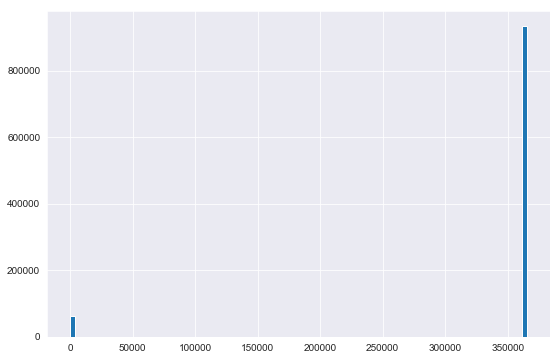

In [72]:
# droppping this
prev_apps.days_first_drawing.hist(bins=100)
prev_apps.drop('days_first_drawing', axis=1, inplace=True)
float_cols.remove('days_first_drawing')
numeric_cols.remove('days_first_drawing')

In [110]:
(prev_apps[numeric_cols]<0).any()

hour_appr_process_start      False
days_decision                False
sellerplace_area             False
amt_annuity                  False
amt_application              False
amt_credit                   False
amt_down_payment             False
amt_goods_price              False
rate_down_payment            False
rate_interest_primary        False
rate_interest_privileged     False
cnt_payment                  False
days_first_due               False
days_last_due_1st_version    False
days_last_due                False
days_termination             False
dtype: bool

### Anomalies

In [75]:
gaps = prev_apps[numeric_cols].apply(lambda s: s.sort_values().diff().max()/s.std())
gaps[gaps>2]


sellerplace_area             387.519600
amt_annuity                    3.233041
amt_application                3.603938
amt_credit                     7.519342
amt_down_payment              27.963823
amt_goods_price                3.345503
rate_interest_primary          3.015751
days_first_due                 5.032145
days_last_due_1st_version      3.406219
days_last_due                  2.434629
days_termination               2.376433
dtype: float64

In [80]:
gaps[gaps>2].index.tolist()

['sellerplace_area',
 'amt_annuity',
 'amt_application',
 'amt_credit',
 'amt_down_payment',
 'amt_goods_price',
 'rate_interest_primary',
 'days_first_due',
 'days_last_due_1st_version',
 'days_last_due',
 'days_termination']

In [112]:
# manual exploration
anom_cols = [
    'sellerplace_area',
    'amt_annuity',
    'days_first_due',
    'days_last_due_1st_version',
    'days_last_due',
    'days_termination'
]


Note should create feature of diff between amt applied for and amt granted

previous_application.csv
days_last_due_1st_version
Relative to application date of current application when was the first due of the previous application

Max Diffs
1075300    365243.0
941733          1.0
1181836         2.0
Name: days_last_due_1st_version, dtype: float64

Largest Vals
17    365243.0
34    365243.0
49    365243.0
82    365243.0
93    365243.0
Name: days_last_due_1st_version, dtype: float64

Smallest Vals
2078     0.0
4429     0.0
4698     0.0
10077    0.0
11789    0.0
Name: days_last_due_1st_version, dtype: float64


(1075300    365243.0
 941733          1.0
 1181836         2.0
 Name: days_last_due_1st_version, dtype: float64, 17    365243.0
 34    365243.0
 49    365243.0
 82    365243.0
 93    365243.0
 Name: days_last_due_1st_version, dtype: float64)

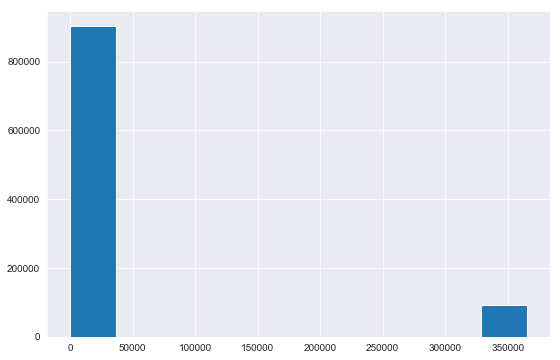

In [104]:
anom_eval(prev_apps, 'days_last_due_1st_version', 'previous_application.csv')

In [113]:
for col in anom_cols:
    print(col)
    max_diff = prev_apps[col].sort_values().diff().max()
    pwr = int(np.log10(max_diff))
    if pwr <2:
        cutoff = max_diff
    else:
        cutoff = int(max_diff/(10**pwr))*(10**pwr)
    
    anoms = prev_apps.loc[prev_apps[col]>=cutoff, col]
    rest = prev_apps.loc[~prev_apps.index.isin(anoms.index), col]

    # replace outliers with median from non-outlying data
    prev_apps.loc[anoms.index, col] = rest.median()
    prev_apps[col+'_anom'] = 0
    
    # indicator
    prev_apps.loc[anoms.index, col+'_anom'] = 1
    
    indicator_cols.append(col+'_anom')

sellerplace_area
amt_annuity
days_first_due
days_last_due_1st_version
days_last_due
days_termination


### Fill NA

In [115]:
obj_nulls = pct_null(prev_apps[obj_cols])
obj_nulls

,n_null,pct_null
name_type_suite,820405,0.491198
product_combination,346,0.000207


In [116]:
prev_apps.name_type_suite.unique()

array([nan, 'Unaccompanied', 'Spouse, partner', 'Family', 'Children',
       'Other_B', 'Other_A', 'Group of people'], dtype=object)

In [120]:
# Just marking name_type_suite as null
prev_apps['name_type_suite'] = prev_apps.name_type_suite.astype(str)

In [123]:
# fill product_combination with mode
prev_apps.fillna({'product_combination':prev_apps.product_combination.mode().squeeze()}, inplace=True)

In [124]:
# numeric nulls fill w median
medians = prev_apps[numeric_cols].median().squeeze()
prev_apps.fillna(medians, inplace=True)

### Encode Cat Vars

In [126]:
prev_apps.columns[prev_apps.nunique()<2]

Index([], dtype='object')

In [127]:
binary_cols = prev_apps[obj_cols].columns[prev_apps[obj_cols].nunique()==2]
binary_cols

Index([], dtype='object')

In [128]:
non_binary_cols = obj_cols.copy()
non_binary_cols

['name_contract_type',
 'weekday_appr_process_start',
 'name_cash_loan_purpose',
 'name_contract_status',
 'name_payment_type',
 'code_reject_reason',
 'name_type_suite',
 'name_client_type',
 'name_goods_category',
 'name_portfolio',
 'name_product_type',
 'channel_type',
 'name_seller_industry',
 'name_yield_group',
 'product_combination']

In [131]:
for col in non_binary_cols:
    print(col)
    ohe_col = pd.get_dummies(prev_apps[col], drop_first=True)
    ohe_col.columns = col + '_' + ohe_col.columns
    prev_apps = pd.concat([prev_apps, ohe_col], axis=1)
    
    indicator_cols.extend(ohe_col.columns.tolist())
    del prev_apps[col]
    obj_cols.remove(col)

In [132]:
prev_apps.to_csv('clean_data/prev_apps.csv', index=False)